# Funzioni (uso avanzato)

Le funzioni, viste come [cittadini di prim'ordine](https://en.wikipedia.org/wiki/First-class_citizen), sono utili in particolare per realizzare:

* [visitor](https://en.wikipedia.org/wiki/Visitor_pattern),
* [dispatch table](https://en.wikipedia.org/wiki/Dispatch_table) con i *dizionari* e
* [memoizzazione](https://en.wikipedia.org/wiki/Memoization) tramite i *decoratori*.

## Visitor

In [ ]:
# una lista di liste

lol = [1, [2, 3], [4, [5, 6]]]

In [ ]:
# come applicare una funzione scalare f a tutti gli elementi?

def visit(f, lol):
  for elem in lol:
    if isinstance(elem, list):
      visit(f, elem)
    else:
      f(elem)

In [ ]:
visit(print, lol)        

1
2
3
4
5
6


## Dispatch table

In [ ]:
# una espressione

expr = '3 + 12 * 4 + 1 * 2'

In [ ]:
# divisione in token (basata sulla presenza di spazi)

tokens = iter(expr.split())

In [ ]:
# "semantica" delle operazioni, tramite dispatch table

def somma(x, y):
  return x + y

def prodotto(x, y):
  return x * y

DT = {
  '+': somma,
  '*': prodotto
}

In [ ]:
# valutazione (SENZA rispettare la precedenza delle operazioni, ma solo l'associatività a sinistra)

result = int(next(tokens))

while True:
  t = next(tokens, None)
  if t is None: break
  op = DT[t]
  result = op(result, int(next(tokens)))

result

122

## Memoizzazione

In [ ]:
# trasformare una funzione rendendola "verbosa"

def rendi_verbosa(f):
  def f_verbosa(x):
    result = f(x)
    print(f'f({x}) = {result}')
    return result
  return f_verbosa

In [ ]:
def quadrato(x):
  return x * x

quadrato_verboso = rendi_verbosa(quadrato)

q = quadrato_verboso(3)

f(3) = 9


In [ ]:
# tenere da parte i risultati già calcolati da una funzione…

cache = {}

def memoize(f):
  def f_memoized(x):
    if x not in cache: cache[x] = f(x)
    return cache[x]
  return f_memoized

In [ ]:
@memoize 
def cubo(x):
  return x ** 3

In [ ]:
cache = {}

cubo(1), cubo(4), cubo(6)

cache

{1: 1, 4: 64, 6: 216}

In [ ]:
def fib(n):
  if n == 0 or n == 1: return 1
  return fib(n - 1) + fib(n - 2)

In [ ]:
%time fib(32)

CPU times: user 529 ms, sys: 0 ns, total: 529 ms
Wall time: 528 ms


3524578

In [ ]:
@memoize
def fib(n):
  if n == 0 or n == 1: return 1
  return fib(n - 1) + fib(n - 2)

In [ ]:
cache = {} 

%time fib(32)

cache

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 22.2 µs


{1: 1,
 0: 1,
 2: 2,
 3: 3,
 4: 5,
 5: 8,
 6: 13,
 7: 21,
 8: 34,
 9: 55,
 10: 89,
 11: 144,
 12: 233,
 13: 377,
 14: 610,
 15: 987,
 16: 1597,
 17: 2584,
 18: 4181,
 19: 6765,
 20: 10946,
 21: 17711,
 22: 28657,
 23: 46368,
 24: 75025,
 25: 121393,
 26: 196418,
 27: 317811,
 28: 514229,
 29: 832040,
 30: 1346269,
 31: 2178309,
 32: 3524578}

# Strutture dati ed algoritmi utili

## Alberi

La rappresentazione più comune che sarà adoperata per il corso per gli alberi $n$-ari sono le *lol* (liste di liste)

In [ ]:
# [radice] 
# [radice alberi…]

tree = [1, [11], [12, [121], [122]], [13]]

Accedere a radice e figli con l'[iterable unpacking](https://docs.python.org/3/reference/expressions.html?highlight=iterable+unpacking#expression-lists)…

In [ ]:
root, *children = tree

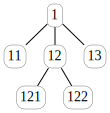

In [ ]:
# uso di liblet per ottenre una rappresentazione grafica 

from liblet import Tree

t = Tree.from_lol(tree)
t

### Visite

* preordine, 
* postordine, 
* per livello.

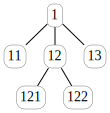

In [ ]:
def preorder(tree, visitor):
  root, *children = tree
  visitor(root)
  for st in children: preorder(st, visitor)
        
t        

In [ ]:
preorder(tree, print)

1
11
12
121
122
13


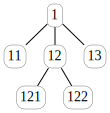

In [ ]:
def postorder(tree, visitor):
  root, *children = tree
  for st in children: postorder(st, visitor)
  visitor(root)
    
t    

In [ ]:
postorder(tree, print)

11
121
122
12
13
1


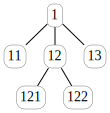

In [ ]:
from liblet import Queue

def levelorder(tree, visitor):

  Q = Queue()

  Q.enqueue(tree)
  while Q:
    tree = Q.dequeue()
    root, *children = tree
    visitor(root)
    for s in children: Q.enqueue(s)

t

In [ ]:
levelorder(tree, print)

1
11
12
13
121
122


### Alberi con attributi (*)

<span style="color: red">Questa sezione non è stata coperta a lezione ed è facoltativa.</span>

Per ora gli alberi avevano interi come velori dei nodi, costruiamo un albero che abbia `dict` come valori (e che conservi il valore numerico come valore della chiave `val`).

In [ ]:
def add_attr(tree):
  root, *children = tree
  return [{'val': root}] + [add_attr(tree) for tree in children]

In [ ]:
tree = [1, [11], [12, [121], [122]], [13]]

add_attr(tree)

[{'val': 1},
 [{'val': 11}],
 [{'val': 12}, [{'val': 121}], [{'val': 122}]],
 [{'val': 13}]]

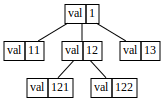

In [ ]:
Tree.from_lol(add_attr(tree))

#### Attributi ereditati e preorder

Come vedremo più avanti, gli attributi ereditati sono attributi che i nodi dei sottoalberi ereditano dal padre; ad esempio la *profondità*.

In [ ]:
def add_depth(tree, parent):
  root, *children = tree
  root['depth'] = parent['depth'] + 1
  for tree in children:
    add_depth(tree, root)

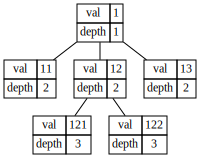

In [ ]:
attr_tree = add_attr(tree)

# uso il nodo fittizio {'depth': 0} come "primo" parent dell'albero

add_depth(attr_tree, {'depth': 0}) 

Tree.from_lol(attr_tree)

#### Attributi sintetizzati e postorder

Gli attributi sintetizzati sono attributi che il nodo radice di un albero ricava dal valore degli attributi nei sottoalberi; ad esempio, il *massimo* valore.

In [ ]:
def add_max(tree):
  root, *children = tree
  if not children: # il massimo di una foglia è il suo valore
    root['max'] = root['val']
    return
  values = []
  for tree in children: 
    add_max(tree)
    values.append(tree[0]['max']) # tree[0] è la root
  root['max'] = max(values)

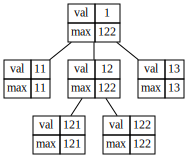

In [ ]:
attr_tree = add_attr(tree)

add_max(attr_tree) 

Tree.from_lol(attr_tree)

## Grafi

Per i grafi sono usuali due rappresentazioni: per *archi* (dappresentati da `tuple` di `tuple`) e tramite la relazione di *adiacenza* (rappresentata da un `dict` di `set`).

In [ ]:
arcs = (
  (1, 2), 
  (1, 4),
  (2, 3), 
  (3, 2), 
  (3, 4), 
  (3, 5)
)

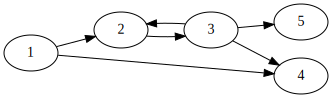

In [ ]:
from liblet import Graph

g = Graph(arcs)
g

In [ ]:
# dagli archi alla mappa delle adiacenze

adjacency = dict()

for s, t in arcs:
  adjacency[s] = adjacency.get(s, set()) | {t}
  adjacency[t] = adjacency.get(t, set())

adjacency

{1: {2, 4}, 2: {3}, 4: set(), 3: {2, 4, 5}, 5: set()}

In [ ]:
# e viceversa 

for s, ts in adjacency.items():
  for t in ts:
    print(s, t)

1 2
1 4
2 3
3 2
3 4
3 5


### Visite

* ampiezza,
* profondità.

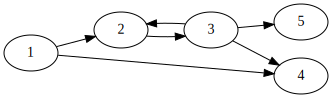

In [ ]:
def depthfirst(adjacency, start, visit):
  def walk(src):
    visit(src)
    seen.add(src)
    for dst in adjacency[src]:
      if dst not in seen: 
        walk(dst)
  seen = set()
  walk(start)

g    

In [ ]:
depthfirst(adjacency, 1, print)

1
2
3
4
5


In [ ]:
def breadthfirst(adjacency, start, visit):
  
  Q = Queue()
  
  seen = set()
  Q.enqueue(start)
  while Q:
    src = Q.dequeue()
    visit(src)
    seen.add(src)
    for dst in adjacency[src]:
      if dst not in seen:
        Q.enqueue(dst)

In [ ]:
breadthfirst(adjacency, 1, print)

1
2
4
3
5


## Backtracking

Il [backtracking](https://en.wikipedia.org/wiki/Backtracking) è uno schema di algoritmi ricorsivi per problemi la cui soluzione possa essere costruita incrementalmente a partire da una soluzione "candidata". Lo schema generale è

```python
def backtrack(candidate):
    if reject(candidate): return
    if accept(candidate): output(candidate)
    s = first(candidate)
    while s:
        backtrack(s)
        s = next(candidate)
```

Le funzioni `reject` e `accept` hanno l'ovvio significato di indicare, rispettivamente, se una soluzione candidata è non corretta (e non ulteriormente emendabile), oppure se costituisce una soluzione (completa). Le funzioni `first` e `next` costruiscono rispettivamente il primo e i successivi candidati a partire dal candidato corrente.

### Segmentazione di una parola

In [ ]:
from urllib.request import urlopen

with urlopen('https://raw.githubusercontent.com/napolux/paroleitaliane/master/paroleitaliane/60000_parole_italiane.txt') as url: 
  WORDS = {word.decode().strip().upper() for word in url if len(word) >= 3}

print(len(WORDS))

60418


In [ ]:
def segmenta(segmenti, resto):
  if segmenti and not segmenti[-1] in WORDS: return
  if not resto: 
    print(segmenti)
    return
  for i in range(1, 1 + len(resto)):
    segmenta(segmenti + [resto[:i]], resto[i:])

In [ ]:
segmenta([], 'PARTITAVOLAMIGLIORE')

['PAR', 'TI', 'TAVOLA', 'MI', 'GLI', 'ORE']
['PAR', 'TI', 'TAVOLA', 'MIGLIO', 'RE']
['PAR', 'TI', 'TAVOLA', 'MIGLIORE']
['PARTI', 'TAVOLA', 'MI', 'GLI', 'ORE']
['PARTI', 'TAVOLA', 'MIGLIO', 'RE']
['PARTI', 'TAVOLA', 'MIGLIORE']
['PARTITA', 'VOL', 'AMI', 'GLI', 'ORE']
['PARTITA', 'VOLA', 'MI', 'GLI', 'ORE']
['PARTITA', 'VOLA', 'MIGLIO', 'RE']
['PARTITA', 'VOLA', 'MIGLIORE']


#### Esempi supplementari

* calcolare la [densità delle soluzioni](https://gist.github.com/mapio/2c8b171110dc6a09dfd6) del [problema delle otto regine](https://en.wikipedia.org/wiki/Eight_queens_puzzle),

* enumerare le [soluzioni](https://gist.github.com/mapio/967f3d8793fcab80941dc0b4f370dbeb) del gioco [Find a way](https://play.google.com/store/apps/details?id=com.zerologicgames.findaway),

* trovare le [soluzioni](https://gist.github.com/mapio/33f1c381870333fe502e) del [Sudoku](https://en.wikipedia.org/wiki/Sudoku).